# Task 5: Exploratory Data Analysis (EDA)

 # Objective: Extract insights using visual and statistical exploration.
 # Tools: Python (Pandas, Matplotlib, Seaborn)

# 1. Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")

# 2. Load Dataset

In [6]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.info()
df.describe()
df.isnull().sum()
df['Survived'].value_counts()
df['Sex'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Sex
male      577
female    314
Name: count, dtype: int64

# 3. Handling Missing Values

In [10]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


# 4. Univariate Analysis

<Axes: xlabel='Age'>

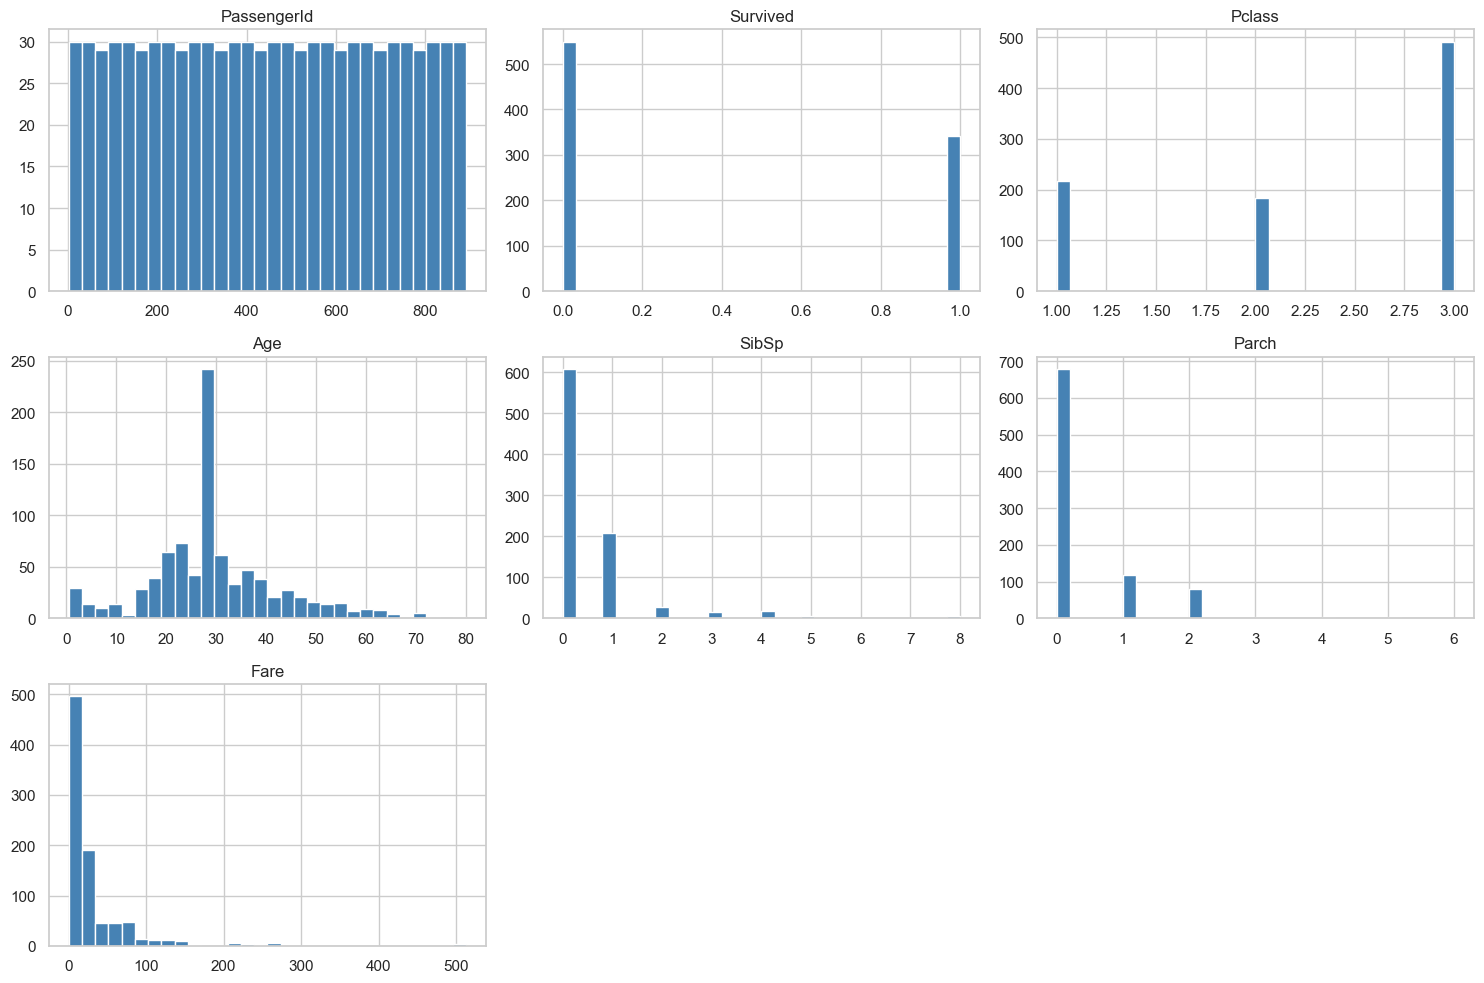

In [12]:
# Histograms
df.hist(bins=30, figsize=(15, 10), color='steelblue')
plt.tight_layout()

# Boxplot of Age
sns.boxplot(x=df['Age'])


# 5. Categorical Analysis

<Axes: xlabel='Survived', ylabel='count'>

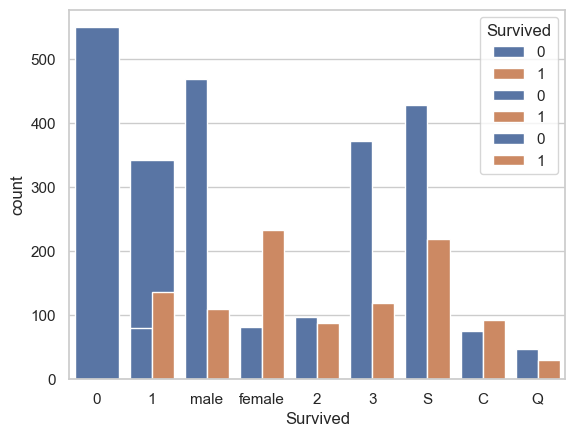

In [13]:
# Countplots
sns.countplot(data=df, x='Survived')
sns.countplot(data=df, x='Sex', hue='Survived')
sns.countplot(data=df, x='Pclass', hue='Survived')
sns.countplot(data=df, x='Embarked', hue='Survived')

# 6. Bivariate Analysis

<Axes: xlabel='Age', ylabel='Fare'>

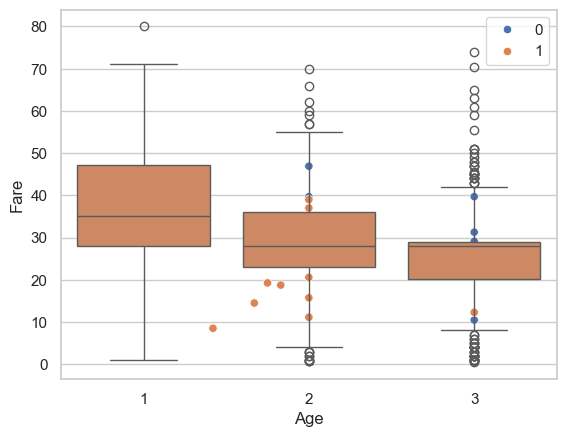

In [14]:
# Scatterplot of Age vs Fare
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)

# Boxplot of Age by Pclass
sns.boxplot(x='Pclass', y='Age', data=df)


# 7. Correlation Analysis

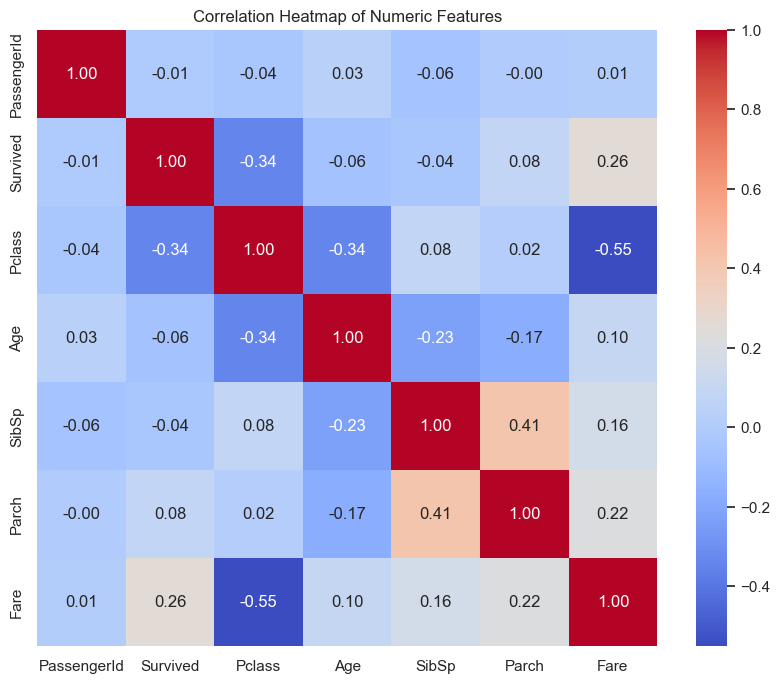

In [16]:
# Select only numeric columns to avoid string conversion issues
numeric_df = df.select_dtypes(include='number')

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


# 8. Pairplot

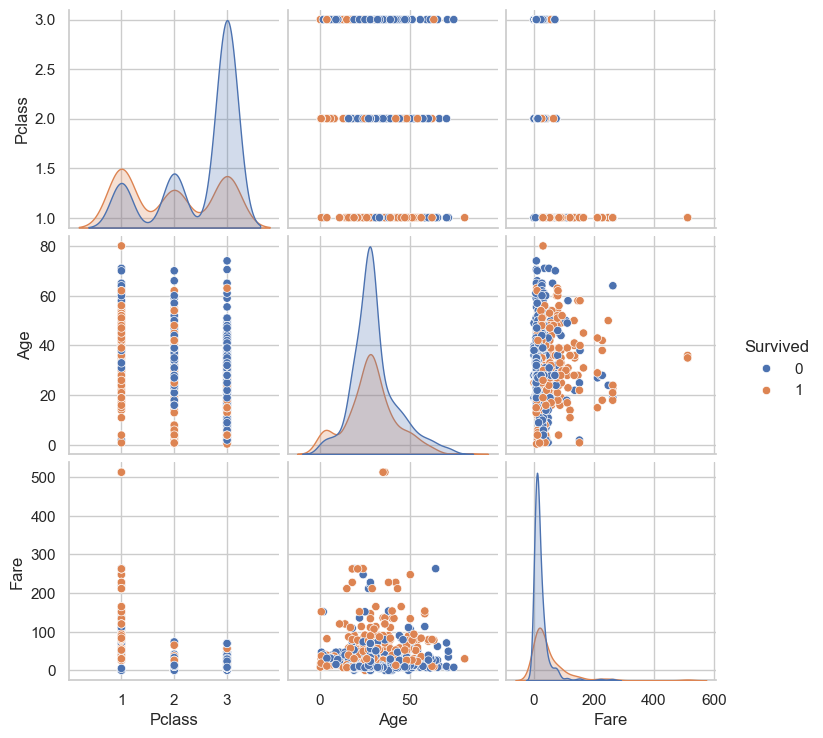

In [17]:
sns.pairplot(df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']], hue='Survived')
